In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# =========================================
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
import pickle
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor

## 데이터 불러오기

In [2]:
data = pd.read_csv('Sleep_Efficiency.csv')

In [3]:
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [4]:
data.shape

(452, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [6]:
data.corr(numeric_only=True).style.background_gradient()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
ID,1.000000,0.021310,0.014333,-0.025624,0.051636,-0.047300,0.036463,-0.056447,-0.059594,0.115352,0.024640
Age,0.021310,1.000000,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.017789,-0.171460,0.047188,0.072308
Sleep duration,0.014333,-0.062462,1.000000,-0.027467,-0.015940,-0.037304,0.041804,0.004939,-0.014802,-0.046243,-0.068272
Sleep efficiency,-0.025624,0.098357,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.564979,0.065082,-0.389624,0.259563
REM sleep percentage,0.051636,0.042091,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.025332,0.060037,-0.053258,0.031768
Deep sleep percentage,-0.047300,0.021730,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.308267,0.001742,-0.361731,0.179102
Light sleep percentage,0.036463,-0.031905,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.321218,-0.015593,0.380571,-0.190191
Awakenings,-0.056447,-0.017789,0.004939,-0.564979,-0.025332,-0.308267,0.321218,1.000000,-0.108615,0.206090,-0.219578
Caffeine consumption,-0.059594,-0.171460,-0.014802,0.065082,0.060037,0.001742,-0.015593,-0.108615,1.000000,-0.123308,-0.068224
Alcohol consumption,0.115352,0.047188,-0.046243,-0.389624,-0.053258,-0.361731,0.380571,0.206090,-0.123308,1.000000,0.006934


- KNN
- SVM

## 전처리

In [7]:
data.drop('ID',axis=1,inplace=True)

In [8]:
col = data.columns

In [9]:
# KNNImputer 사용위한 전처리

In [10]:
# Gender 
# female: 0 / male: 1
data['Gender'].replace({'Female':0,'Male':1},inplace = True)

C:\Users\cho56\AppData\Local\Temp\ipykernel_16944\3909329157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace({'Female':0,'Male':1},inplace = True)
C:\Users\cho56\AppData\Local\Temp\ipykernel_16944\3909329157.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'

In [11]:
data['Gender'].value_counts()

Gender
1    228
0    224
Name: count, dtype: int64

In [12]:
data['Bedtime'] = pd.to_datetime(data['Bedtime'])
data['Wakeup time'] = pd.to_datetime(data['Wakeup time'])

In [13]:
data['Bedtime'] = data['Bedtime'].dt.hour + data['Bedtime'].dt.minute/60
data['Wakeup time'] = data['Wakeup time'].dt.hour +data['Wakeup time'].dt.minute/60

In [14]:
data['Bedtime'].value_counts()

Bedtime
0.0     75
22.0    56
23.0    55
21.0    38
1.0     35
21.5    35
0.5     35
2.0     32
2.5     32
1.5     32
22.5    27
Name: count, dtype: int64

In [15]:
data['Wakeup time'].value_counts()

Wakeup time
9.0     49
7.0     46
5.0     46
8.0     35
6.0     35
5.5     34
7.5     32
6.5     29
10.0    27
9.5     25
8.5     25
4.5     24
4.0     19
10.5     8
3.0      7
11.0     4
3.5      3
11.5     2
12.5     2
Name: count, dtype: int64

In [16]:
# Smoking Status
# No: 0, Yes: 1
data['Smoking status']=data['Smoking status'].replace({'No':0,'Yes':1})

C:\Users\cho56\AppData\Local\Temp\ipykernel_16944\608387255.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Smoking status']=data['Smoking status'].replace({'No':0,'Yes':1})


In [17]:
data['Smoking status'].value_counts()

Smoking status
0    298
1    154
Name: count, dtype: int64

### 결측치 (KNNImputer)

In [18]:
data.isna().sum()

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [19]:
imputer = KNNImputer(n_neighbors = 5)

In [20]:
data = imputer.fit_transform(data)

In [21]:
data= pd.DataFrame(data, columns=col)

In [22]:
data.isna().sum()

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

### 가변수화

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    float64
 1   Gender                  452 non-null    float64
 2   Bedtime                 452 non-null    float64
 3   Wakeup time             452 non-null    float64
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    float64
 7   Deep sleep percentage   452 non-null    float64
 8   Light sleep percentage  452 non-null    float64
 9   Awakenings              452 non-null    float64
 10  Caffeine consumption    452 non-null    float64
 11  Alcohol consumption     452 non-null    float64
 12  Smoking status          452 non-null    float64
 13  Exercise frequency      452 non-null    float64
dtypes: float64(14)
memory usage: 49.6 KB


In [24]:
data.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65.0,0.0,1.0,7.0,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,1.0,3.0
1,69.0,1.0,2.0,9.0,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,1.0,3.0
2,40.0,0.0,21.5,5.5,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,0.0,3.0
3,40.0,0.0,2.5,8.5,6.0,0.51,23.0,25.0,52.0,3.0,50.0,5.0,1.0,1.0
4,57.0,1.0,1.0,9.0,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,0.0,3.0


In [25]:
data['Sleep time'] = data['Wakeup time']-data['Bedtime']

In [26]:
data['Sleep time'].value_counts()

Sleep time
-17.0    80
 7.0     74
-16.0    52
 8.0     51
 7.5     46
-16.5    42
 8.5     21
-18.0    19
 9.0     19
 6.0     15
-15.0     7
 10.0     7
 5.0      7
-15.5     7
-18.5     2
-19.0     1
-14.0     1
 5.5      1
Name: count, dtype: int64

In [27]:
data['Sleep time'] = data['Sleep time'].apply(lambda x: x + 24 if x < 0 else x)

In [28]:
data['Sleep time'].value_counts()

Sleep time
7.0     154
8.0     103
7.5      88
6.0      34
8.5      28
9.0      26
10.0      8
5.0       8
5.5       3
Name: count, dtype: int64

In [29]:
data.drop(['Wakeup time','Bedtime'],axis=1,inplace=True)

In [30]:
data.columns

Index(['Age', 'Gender', 'Sleep duration', 'Sleep efficiency',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Sleep time'],
      dtype='object')

### Scaling

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,452.0,40.285398,13.172250,9.0,29.0000,40.00,52.0,69.00
Gender,452.0,0.504425,0.500534,0.0,0.0000,1.00,1.0,1.00
Sleep duration,452.0,7.465708,0.866625,5.0,7.0000,7.50,8.0,10.00
Sleep efficiency,452.0,0.788916,0.135237,0.5,0.6975,0.82,0.9,0.99
REM sleep percentage,452.0,22.615044,3.525963,15.0,20.0000,22.00,25.0,30.00
Deep sleep percentage,452.0,52.823009,15.654235,18.0,48.2500,58.00,63.0,75.00
Light sleep percentage,452.0,24.561947,15.313665,7.0,15.0000,18.00,32.5,63.00
Awakenings,452.0,1.643805,1.334559,0.0,1.0000,1.00,3.0,4.00
Caffeine consumption,452.0,23.860619,29.646409,0.0,0.0000,25.00,50.0,200.00
Alcohol consumption,452.0,1.189381,1.613599,0.0,0.0000,0.00,2.0,5.00


In [32]:
col = data.columns

In [33]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data)
data_sc = pd.DataFrame(data_sc, columns=col)

In [34]:
data_sc.head()

,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep time
0,1.878342,-1.008889,-1.693157,0.674260,-1.310325,1.098490,-0.821219,-1.233086,-0.805732,-0.737915,1.391066,0.853862,-1.693157
1,2.182347,0.991189,-0.537977,-0.954315,-1.026401,-1.587463,1.859095,1.017338,-0.805732,1.123344,1.391066,0.853862,-0.537977
2,-0.021691,-1.008889,0.617204,0.748286,-0.742476,1.098490,-0.951966,-0.482945,-0.805732,-0.737915,-0.718873,0.853862,0.617204
3,-0.021691,-1.008889,-1.693157,-2.064707,0.109298,-1.779316,1.793722,1.017338,0.882682,2.364182,1.391066,-0.555728,-1.693157
4,1.270331,0.991189,0.617204,-0.214054,1.244997,0.139221,-0.428977,1.017338,-0.805732,1.123344,-0.718873,0.853862,0.617204


In [35]:
# target 확인
target = 'Sleep efficiency'

# 데이터 분리
x = data.drop(columns=target)
y = data.loc[:, target]

In [36]:
# train,val,test로 5:2:3

In [37]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5, random_state=1)

In [38]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.6, random_state=1)

## KNN

### Default

In [39]:
model_k = KNeighborsRegressor()

In [40]:
model_k.fit(x_train, y_train)

KNeighborsRegressor()

In [41]:
y_pred = model_k.predict(x_val)

In [42]:
print("MAE:",mean_absolute_error(y_val, y_pred))
print("R2:",r2_score(y_val, y_pred))

MAE: 0.05171111111111113
R2: 0.7527180207720203


#### test data

In [43]:
y_t = model_k.predict(x_test)

In [44]:
print("MAE:",mean_absolute_error(y_test, y_t))
print("R2:",r2_score(y_test, y_t))

MAE: 0.06133823529411765
R2: 0.7080914350310884


### GridSearch CV

In [45]:
# 성능예측
cv_score = cross_val_score(KNeighborsRegressor(),x_train,y_train,cv=10)

In [46]:
print(cv_score)
print(cv_score.mean())

[0.34259361 0.79526769 0.64289474 0.61195059 0.82047794 0.68393343
 0.66703302 0.86099104 0.59754102 0.56992688]
0.659260994678748


In [47]:
param = {'n_neighbors' : range(1,50),
         'weights': ['uniform', 'distance'], #'distance'로 설정하면 이웃 간의 거리의 역수에 따라 가중치
         'metric': ['minkowski','euclidean','manhattan','chebyshev'], 
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], #ball_tree와 kd_tree는 데이터 구조를 사용해 검색을 최적화하며, brute는 단순히 모든 포인트와 거리를 계산
         'leaf_size': range(5,30,5) #ball_tree와 kd_tree 알고리즘에서 사용하는 리프의 크기
        }

model_knn = GridSearchCV(KNeighborsRegressor(),
                     param,
                     cv=5,
                     scoring=['r2', 'neg_mean_absolute_error'],  # MAE는 부호를 바꿔서 사용
                     refit='r2',
                     n_jobs=-1)  # 기본적으로 MAE 기준으로 최적 모델 선택

model_knn.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(5, 30, 5),
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'])

In [48]:
# 예측 결과 확인
print(model_knn.best_params_)
print(model_knn.best_score_)

{'algorithm': 'auto', 'leaf_size': 25, 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
0.7264076449486165


#### test data

In [49]:
result={}

In [50]:
y_t = model_knn.best_estimator_.predict(x_test)

In [51]:
result['knn']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [52]:
result

{'knn': (0.05755635382271662, 0.7529893864862017)}

#### 저장

In [53]:
with open('model_knn.pkl', 'wb') as file:
    pickle.dump(model_knn.best_estimator_, file)

In [54]:
# 모델 불러오기
with open('model_knn.pkl', 'rb') as file:
    loaded_model_knn = pickle.load(file)

## SVM

### Default

In [55]:
model_s = SVR()

In [56]:
model_s.fit(x_train, y_train)

SVR()

In [57]:
y_pred = model_s.predict(x_val)

In [58]:
print("MAE:",mean_absolute_error(y_val, y_pred))
print("R2:",r2_score(y_val, y_pred))

MAE: 0.05971610027544988
R2: 0.7329940261003107


#### test

In [59]:
y_t = model_k.predict(x_test)

In [60]:
print("MAE:",mean_absolute_error(y_test, y_t))
print("R2:",r2_score(y_test, y_t))

MAE: 0.06133823529411765
R2: 0.7080914350310884


### GridSearch CV

In [61]:
# 성능예측
cv_score = cross_val_score(SVR(),x_train,y_train,cv=10)

In [62]:
print(cv_score)
print(cv_score.mean())

[0.61523094 0.77910001 0.68054229 0.59187349 0.67801025 0.7180857
 0.60129832 0.82443993 0.61189424 0.61250709]
0.6712982267850689


In [63]:
param_grid = {'C': [0.01, 1, 100],
              'kernel': ['linear', 'rbf','poly','sigmoid'],
              'degree': [2, 3, 4], #다항 커널 (poly)을 사용할 때 다항식의 차수를 지정
              'gamma': ['scale', 'auto', 0.01, 0.1, 1], #rbf, poly, sigmoid 커널에서 사용되는 매개변수로, 데이터 포인트의 영향 범위
              'epsilon': [0.1, 0.2, 0.5], #오차 허용 범위
              'shrinking': [True,False], #휴리스틱을 사용해 최적화를 수행할지 여부를
              'coef0': [0, 0.5, 1], #다항 커널 (poly) 및 시그모이드 커널 (sigmoid)에서 상수 항을 조정
             }

In [64]:
model_svr = GridSearchCV ( SVR(),
                          param_grid,
                          cv=10,
                          scoring=['r2', 'neg_mean_absolute_error'],  # MAE는 부호를 바꿔서 사용
                          refit='r2',
                          n_jobs=-1)

#학습
# train data로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
model_svr.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 1, 100], 'coef0': [0, 0.5, 1],
                         'degree': [2, 3, 4], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'])

In [65]:
# 예측 결과 확인
print(model_svr.best_params_)
print(model_svr.best_score_)

{'C': 1, 'coef0': 0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}
0.7773291435544744


#### test data

In [66]:
y_t = model_svr.best_estimator_.predict(x_test)

In [67]:
result['svr']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [68]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695)}

#### 저장

In [69]:
with open('model_svr.pkl', 'wb') as file:
    pickle.dump(model_svr.best_estimator_, file)

In [70]:
# 모델 불러오기
with open('model_svr.pkl', 'rb') as file:
    loaded_model_svr = pickle.load(file)

## 앙상블 - Stacking

### KNN+SVR

In [71]:
stacking_regressor = StackingRegressor(
    estimators=[('knn',loaded_model_knn), ('svr',loaded_model_svr)],
    final_estimator=LinearRegression()
)

In [72]:
# 모델 학습
stacking_regressor.fit(x_train, y_train)

StackingRegressor(estimators=[('knn',
                               KNeighborsRegressor(leaf_size=25,
                                                   metric='manhattan',
                                                   n_neighbors=15,
                                                   weights='distance')),
                              ('svr',
                               SVR(C=1, coef0=0, degree=2, kernel='linear'))],
                  final_estimator=LinearRegression())

In [73]:
# 예측 및 성능 평가
stacking_pred = stacking_regressor.predict(x_val)
print("Stacking Regressor MSE:", mean_squared_error(y_val, stacking_pred))
print("R2:",r2_score(y_val, stacking_pred))

Stacking Regressor MSE: 0.0036213676959939694
R2: 0.7937208671847285


#### test data

In [74]:
y_t = stacking_regressor.predict(x_test)

In [75]:
result['es:k+s']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [76]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695),
 'es:k+s': (0.0536457755212822, 0.7708985575995616)}

### KNN+KNN

In [77]:
stacking_regressor2 = StackingRegressor(
    estimators=[('knn_1',loaded_model_knn), ('knn_2',loaded_model_knn)],
    final_estimator=LinearRegression()
)

In [78]:
# 모델 학습
stacking_regressor2.fit(x_train, y_train)

StackingRegressor(estimators=[('knn_1',
                               KNeighborsRegressor(leaf_size=25,
                                                   metric='manhattan',
                                                   n_neighbors=15,
                                                   weights='distance')),
                              ('knn_2',
                               KNeighborsRegressor(leaf_size=25,
                                                   metric='manhattan',
                                                   n_neighbors=15,
                                                   weights='distance'))],
                  final_estimator=LinearRegression())

In [79]:
# 예측 및 성능 평가
stacking_pred2 = stacking_regressor2.predict(x_val)
print("Stacking Regressor MSE:", mean_squared_error(y_val, stacking_pred2))
print("R2:",r2_score(y_val, stacking_pred2))

Stacking Regressor MSE: 0.004070048707678019
R2: 0.7681632497952406


#### test data

In [80]:
y_t = stacking_regressor2.predict(x_test)

In [81]:
result['es:k+k']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [82]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695),
 'es:k+s': (0.0536457755212822, 0.7708985575995616),
 'es:k+k': (0.05760814889031168, 0.7538620532563511)}

### SVR+SVR

In [83]:
stacking_regressor3 = StackingRegressor(
    estimators=[('svr_1',loaded_model_svr), ('svr_2',loaded_model_svr)],
    final_estimator=LinearRegression()
)

In [84]:
# 모델 학습
stacking_regressor3.fit(x_train, y_train)

StackingRegressor(estimators=[('svr_1',
                               SVR(C=1, coef0=0, degree=2, kernel='linear')),
                              ('svr_2',
                               SVR(C=1, coef0=0, degree=2, kernel='linear'))],
                  final_estimator=LinearRegression())

In [85]:
# 예측 및 성능 평가
stacking_pred3 = stacking_regressor3.predict(x_val)
print("Stacking Regressor MSE:", mean_squared_error(y_val, stacking_pred3))
print("R2:",r2_score(y_val, stacking_pred3))

Stacking Regressor MSE: 0.003927510633957293
R2: 0.7762824557716999


#### test data

In [86]:
y_t = stacking_regressor3.predict(x_test)

In [87]:
result['es:s+s']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [88]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695),
 'es:k+s': (0.0536457755212822, 0.7708985575995616),
 'es:k+k': (0.05760814889031168, 0.7538620532563511),
 'es:s+s': (0.05575626932772149, 0.752095477217004)}

In [89]:
# with open('model_ens.pkl', 'wb') as file:
#     pickle.dump(stacking_regressor, file)

# 앙상블 - Voting

### knn+svr

In [90]:
# 보팅 모델 선언
estimators = [('knn',loaded_model_knn), ('svr_2',loaded_model_svr)]

voting_regressor1 = VotingRegressor(estimators=estimators)

# 학습하기
voting_regressor1.fit(x_train, y_train)


VotingRegressor(estimators=[('knn',
                             KNeighborsRegressor(leaf_size=25,
                                                 metric='manhattan',
                                                 n_neighbors=15,
                                                 weights='distance')),
                            ('svr_2',
                             SVR(C=1, coef0=0, degree=2, kernel='linear'))])

In [91]:
# 예측 및 성능 평가
voting_pred1 = voting_regressor1.predict(x_val)
print("Stacking Regressor MSE:", mean_squared_error(y_val, voting_pred1))
print("R2:",r2_score(y_val, voting_pred1))

Stacking Regressor MSE: 0.0034755118121069196
R2: 0.8020290611517504


#### test data

In [92]:
y_t = voting_regressor1.predict(x_test)

In [93]:
result['ev:k+s']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [94]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695),
 'es:k+s': (0.0536457755212822, 0.7708985575995616),
 'es:k+k': (0.05760814889031168, 0.7538620532563511),
 'es:s+s': (0.05575626932772149, 0.752095477217004),
 'ev:k+s': (0.05375784821067704, 0.7805610210569858)}

### svr+svr

In [95]:
# 보팅 모델 선언
estimators = [('svr_1',loaded_model_svr), ('svr_2',loaded_model_svr)]

voting_regressor2 = VotingRegressor(estimators=estimators)

# 학습하기
voting_regressor2.fit(x_train, y_train)


VotingRegressor(estimators=[('svr_1',
                             SVR(C=1, coef0=0, degree=2, kernel='linear')),
                            ('svr_2',
                             SVR(C=1, coef0=0, degree=2, kernel='linear'))])

In [96]:
# 예측 및 성능 평가
voting_pred2 = voting_regressor2.predict(x_val)
print("Stacking Regressor MSE:", mean_squared_error(y_val, voting_pred2))
print("R2:",r2_score(y_val, voting_pred2))

Stacking Regressor MSE: 0.004034153522548024
R2: 0.7702078992985347


#### test data

In [97]:
y_t = voting_regressor2.predict(x_test)

In [98]:
result['ev:s+s']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [99]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695),
 'es:k+s': (0.0536457755212822, 0.7708985575995616),
 'es:k+k': (0.05760814889031168, 0.7538620532563511),
 'es:s+s': (0.05575626932772149, 0.752095477217004),
 'ev:k+s': (0.05375784821067704, 0.7805610210569858),
 'ev:s+s': (0.05662129630835678, 0.753856036006695)}

### knn+knn

In [100]:
# 보팅 모델 선언
estimators = [('knn_1',loaded_model_knn), ('knn_2',loaded_model_knn)]

voting_regressor3 = VotingRegressor(estimators=estimators)

# 학습하기
voting_regressor3.fit(x_train, y_train)


VotingRegressor(estimators=[('knn_1',
                             KNeighborsRegressor(leaf_size=25,
                                                 metric='manhattan',
                                                 n_neighbors=15,
                                                 weights='distance')),
                            ('knn_2',
                             KNeighborsRegressor(leaf_size=25,
                                                 metric='manhattan',
                                                 n_neighbors=15,
                                                 weights='distance'))])

In [101]:
# 예측 및 성능 평가
voting_pred3 = voting_regressor3.predict(x_val)
print("Stacking Regressor MSE:", mean_squared_error(y_val, voting_pred3))
print("R2:",r2_score(y_val, voting_pred3))

Stacking Regressor MSE: 0.004060261722222937
R2: 0.7687207327801315


#### test data

In [102]:
y_t = voting_regressor3.predict(x_test)

In [103]:
result['ev:k+k']=(mean_absolute_error(y_test, y_t),r2_score(y_test, y_t))

In [104]:
result

{'knn': (0.05755635382271662, 0.7529893864862017),
 'svr': (0.05662129630835678, 0.753856036006695),
 'es:k+s': (0.0536457755212822, 0.7708985575995616),
 'es:k+k': (0.05760814889031168, 0.7538620532563511),
 'es:s+s': (0.05575626932772149, 0.752095477217004),
 'ev:k+s': (0.05375784821067704, 0.7805610210569858),
 'ev:s+s': (0.05662129630835678, 0.753856036006695),
 'ev:k+k': (0.05755635382271662, 0.7529893864862017)}

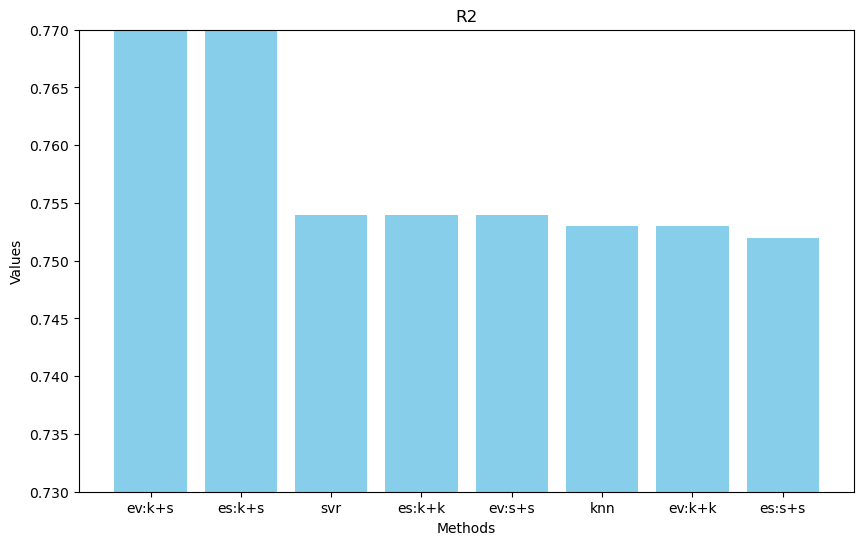

In [105]:
sorted_data = sorted(
    {key: round(value[1], 3) for key, value in result.items()}.items(),
    key=lambda x: x[1],
    reverse=True
)

# 레이블과 값 분리
labels, values = zip(*sorted_data)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.title('R2')
plt.ylim(0.73, 0.77)  # y축 범위 설정
plt.show()

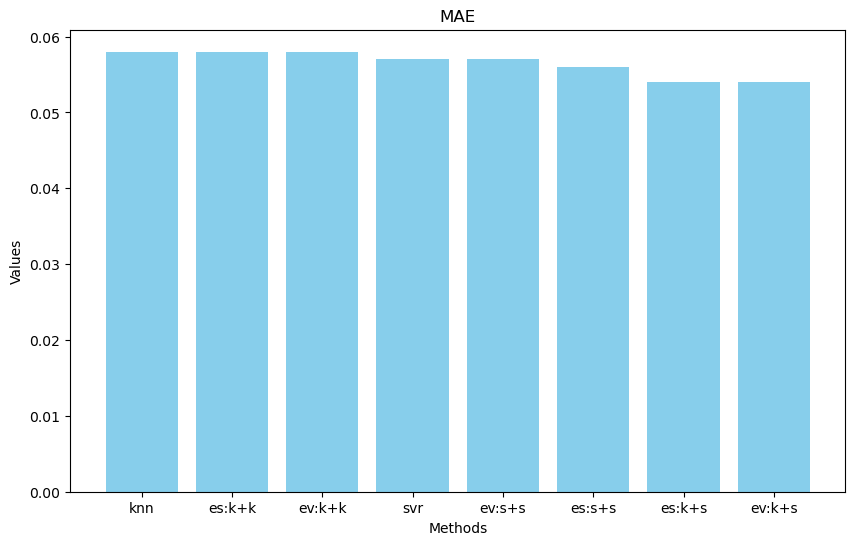

In [106]:
sorted_data = sorted(
    {key: round(value[0], 3) for key, value in result.items()}.items(),
    key=lambda x: x[1],
    reverse=True
)

# 레이블과 값 분리
labels, values = zip(*sorted_data)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.title('MAE')
plt.show()